# Problem Statement
A US bikesharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
● Which variables are significant in predicting the demand for shared bikes.
● How well those variables describe the bike demands

In [1]:
#Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
#loading the data sets to pandas dataframe variable
bike=pd.read_csv('day.csv', encoding='ISO-8859-1')
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
#Checking values and data of each column of dataset.
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
#checking number of rows and columns in data set
bike.shape

(730, 16)

In [5]:
#Checking null values present in each column of dataset.
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
#checking the detatils for columns in data set
bike.describe().transpose()

count         mean          std        min          25%  \
instant     730.0   365.500000   210.877136   1.000000   183.250000   
season      730.0     2.498630     1.110184   1.000000     2.000000   
yr          730.0     0.500000     0.500343   0.000000     0.000000   
mnth        730.0     6.526027     3.450215   1.000000     4.000000   
holiday     730.0     0.028767     0.167266   0.000000     0.000000   
weekday     730.0     2.997260     2.006161   0.000000     1.000000   
workingday  730.0     0.683562     0.465405   0.000000     0.000000   
weathersit  730.0     1.394521     0.544807   1.000000     1.000000   
temp        730.0    20.319259     7.506729   2.424346    13.811885   
atemp       730.0    23.726322     8.150308   3.953480    16.889713   
hum         730.0    62.765175    14.237589   0.000000    52.000000   
windspeed   730.0    12.763620     5.195841   1.500244     9.041650   
casual      730.0   849.249315   686.479875   2.000000   316.250000   
registered  730.0  3658.757534  1559.758728  20.000000  2502.250000   
cnt         730.0  4508.006849  1936.011647  22.000000  3169.750000   

                    50%          75%          max  
instant      365.500000   547.750000   730.000000  
season         3.000000     3.000000     4.000000  
yr             0.500000     1.000000     1.000000  
mnth           7.000000    10.000000    12.000000  
holiday        0.000000     0.000000     1.000000  
weekday        3.000000     5.000000     6.000000  
workingday     1.000000     1.000000     1.000000  
weathersit     1.000000     2.000000     3.000000  
temp          20.465826    26.880615    35.328347  
atemp         24.368225    30.445775    42.044800  
hum           62.625000    72.989575    97.250000  
windspeed     12.125325    15.625589    34.000021  
casual       717.000000  1096.500000  3410.000000  
registered  3664.500000  4783.250000  6946.000000  
cnt         4548.500000  5966.000000  8714.000000

In [7]:
#Checking for correlation between the various columns of the data. So that similar impactful columns can be dropped.
corelationmap=bike.corr()
corelationmap.style.background_gradient(cmap='coolwarm')

In [9]:
#sns.pairplot(bike)
#plt.show()

In [13]:
bike.dteday.value_counts()

14-09-2019    1
21-11-2019    1
31-01-2019    1
08-03-2018    1
04-04-2019    1
             ..
29-06-2018    1
16-02-2019    1
07-08-2018    1
07-01-2018    1
30-01-2019    1
Name: dteday, Length: 730, dtype: int64

In [15]:
#taking a look of data into the dataset
bike.head(100)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0         1  01-01-2018       1   0     1        0        6           0   
1         2  02-01-2018       1   0     1        0        0           0   
2         3  03-01-2018       1   0     1        0        1           1   
3         4  04-01-2018       1   0     1        0        2           1   
4         5  05-01-2018       1   0     1        0        3           1   
..      ...         ...     ...  ..   ...      ...      ...         ...   
95       96  06-04-2018       2   0     4        0        3           1   
96       97  07-04-2018       2   0     4        0        4           1   
97       98  08-04-2018       2   0     4        0        5           1   
98       99  09-04-2018       2   0     4        0        6           0   
99      100  10-04-2018       2   0     4        0        0           0   

    weathersit       temp     atemp      hum  windspeed  casual  registered  \
0            2  14.110847  18.18125  80.5833  10.749882     331         654   
1            2  14.902598  17.68695  69.6087  16.652113     131         670   
2            1   8.050924   9.47025  43.7273  16.636703     120        1229   
3            1   8.200000  10.60610  59.0435  10.739832     108        1454   
4            1   9.305237  11.46350  43.6957  12.522300      82        1518   
..         ...        ...       ...      ...        ...     ...         ...   
95           1  16.024153  19.38040  47.0833  17.625221     413        2395   
96           1  17.937500  21.68480  60.2917  10.874904     571        2570   
97           2  13.769153  16.22395  83.6250  15.208464     172        1299   
98           2  14.042500  17.07645  87.7500   8.916561     879        1576   
99           2  17.493347  21.33685  85.7500   9.833389    1188        1707   

     cnt  
0    985  
1    801  
2   1349  
3   1562  
4   1600  
..   ...  
95  2808  
96  3141  
97  1471  
98  2455  
99  2895  

[100 rows x 16 columns]

In [92]:
#Since the most of details distracted from the column Dteday so dropping it. And our target analysis is to find total count
#of users so we don't need the more precious detials like casual user or registered user so dropping these columns.
bike=bike.drop(['instant','dteday','casual','registered'],axis=1)

In [63]:
#checking the number of rows and columns remains into dataset 
bike.shape

(730, 12)

In [93]:
#Columns temp and atemp are highly correalted with each other so they implies the same results so dropping one column.
bike=bike.drop('atemp',axis=1)

In [94]:
#checking the number of rows and columns remains into dataset 
bike.shape

(730, 11)

In [21]:
#lets take a look of remaining columns of the dataset.
bike.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

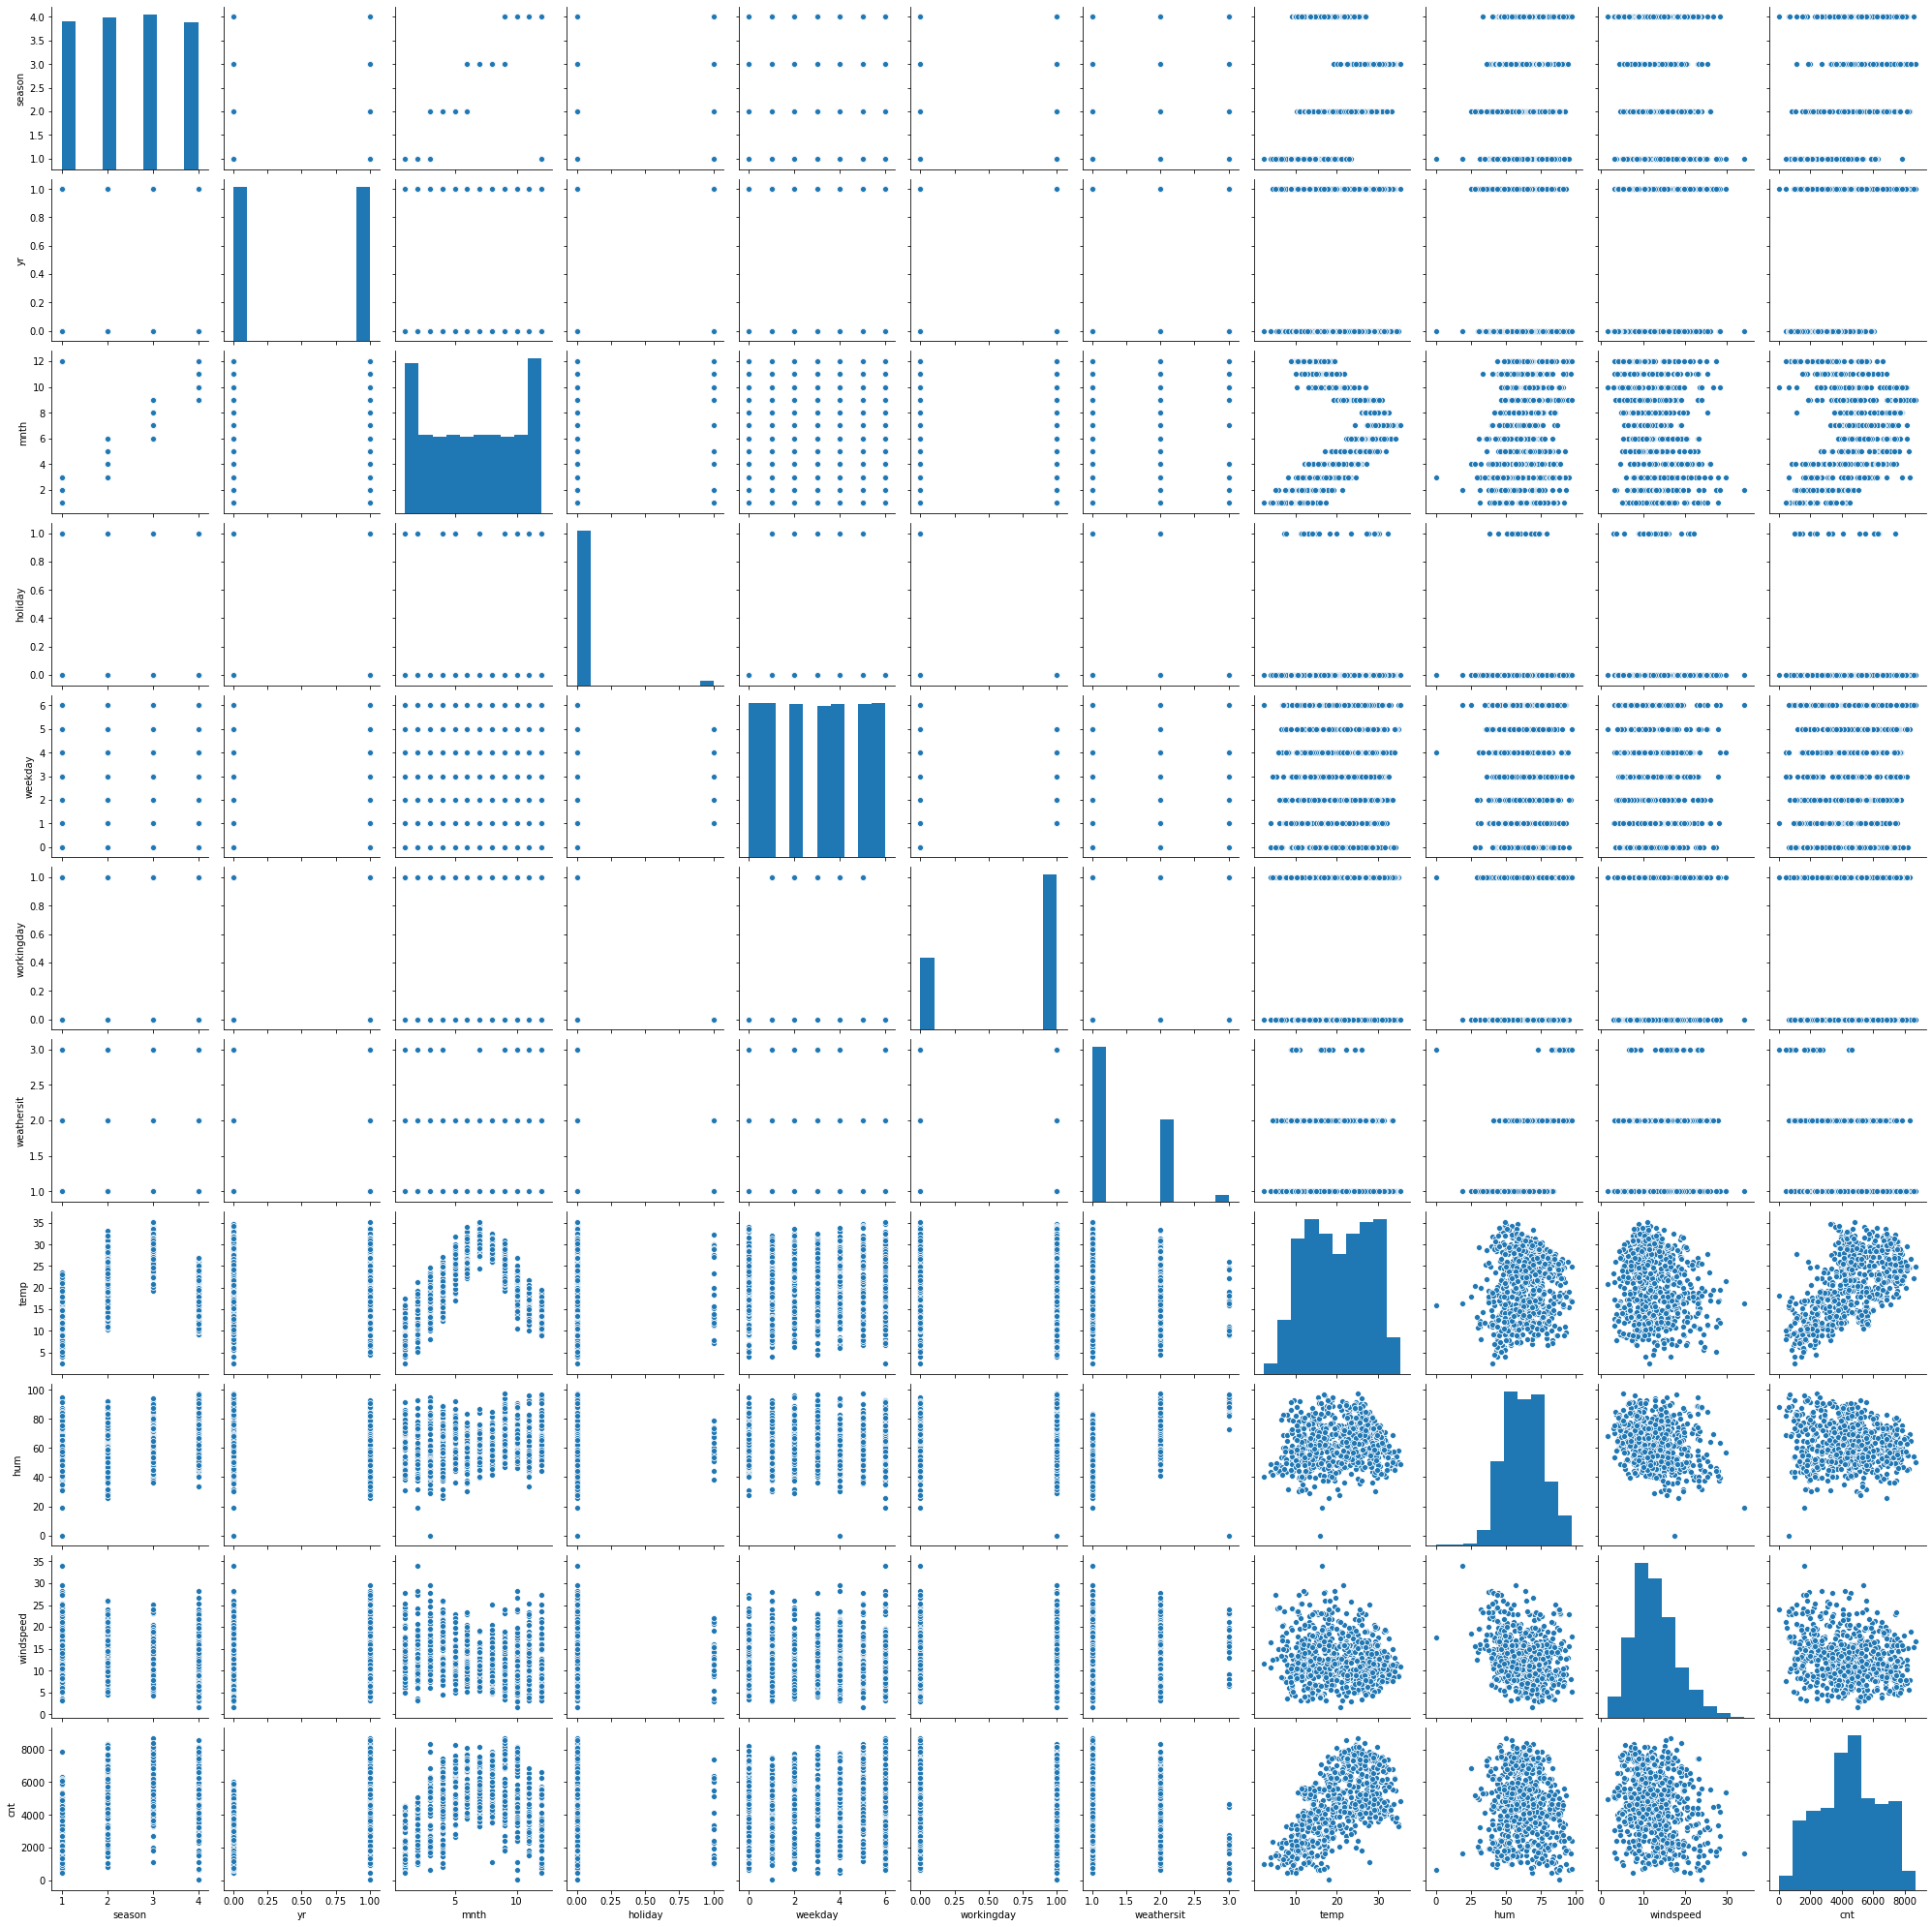

In [22]:
#plotting pairplots for all the pairs in the data set for better undertanding of data by visual representation. 
sns.pairplot(bike)
plt.show()

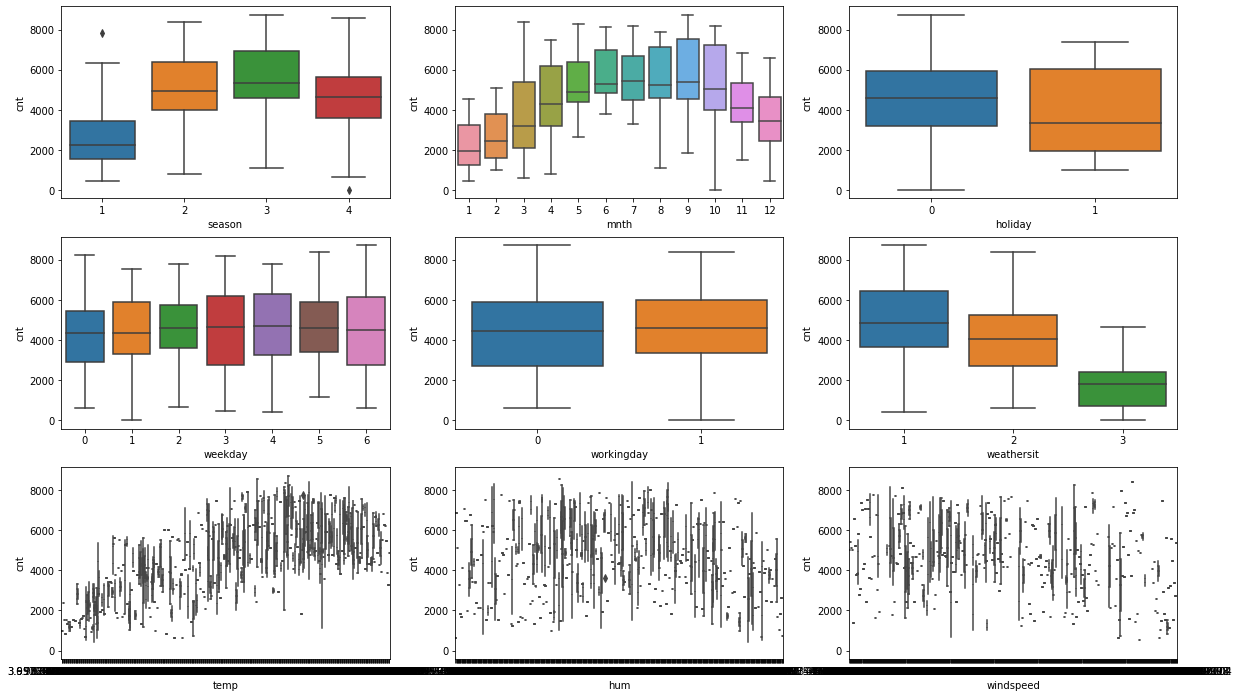

In [25]:
#Our target variable is total count of customers. So plotting boxplots with respect to count for quick understaing of data via visuals.
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'temp', y = 'cnt', data = bike)
plt.subplot(3,3,8)
sns.boxplot(x = 'hum', y = 'cnt', data = bike)
plt.subplot(3,3,9)
sns.boxplot(x = 'windspeed', y = 'cnt', data = bike)
plt.show()

In [27]:
#Lets take a look for values in season column
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [30]:
#Lets take a look for values in yr column
bike.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

In [31]:
#Lets take a look for values in mnth column
bike.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [32]:
#Lets take a look for values in holiday column
bike.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [33]:
#Lets take a look for values in weekday column
bike.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [34]:
#Lets take a look for values in workingday column
bike.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [35]:
#Lets take a look for values in weathersit column
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [99]:
# Let's drop the first column from status df using 'drop_first = True'
seasonstatus = pd.get_dummies(bike['season'])
seasonstatus.head()

1  2  3  4
0  1  0  0  0
1  1  0  0  0
2  1  0  0  0
3  1  0  0  0
4  1  0  0  0

In [96]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'seasonstatus'
bikeWithDummy = pd.get_dummies(bike,prefix=['month','season', 'weathersit','weekday'], columns=['mnth','season', 'weathersit','weekday'],drop_first=True)

In [100]:
bikeWithDummy.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  month_2  \
0   0        0           0  14.110847  80.5833  10.749882   985        0   
1   0        0           0  14.902598  69.6087  16.652113   801        0   
2   0        0           1   8.050924  43.7273  16.636703  1349        0   
3   0        0           1   8.200000  59.0435  10.739832  1562        0   
4   0        0           1   9.305237  43.6957  12.522300  1600        0   

   month_3  month_4  ...  season_3  season_4  weathersit_2  weathersit_3  \
0        0        0  ...         0         0             1             0   
1        0        0  ...         0         0             1             0   
2        0        0  ...         0         0             0             0   
3        0        0  ...         0         0             0             0   
4        0        0  ...         0         0             0             0   

   weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  
0          0          0          0          0          0          1  
1          0          0          0          0          0          0  
2          1          0          0          0          0          0  
3          0          1          0          0          0          0  
4          0          0          1          0          0          0  

[5 rows x 29 columns]

In [101]:
#bikeWithDummy.drop(['season','weathersit','weekday'],axis=1, inplace=True)
bikeWithDummy.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  month_2  \
0   0        0           0  14.110847  80.5833  10.749882   985        0   
1   0        0           0  14.902598  69.6087  16.652113   801        0   
2   0        0           1   8.050924  43.7273  16.636703  1349        0   
3   0        0           1   8.200000  59.0435  10.739832  1562        0   
4   0        0           1   9.305237  43.6957  12.522300  1600        0   

   month_3  month_4  ...  season_3  season_4  weathersit_2  weathersit_3  \
0        0        0  ...         0         0             1             0   
1        0        0  ...         0         0             1             0   
2        0        0  ...         0         0             0             0   
3        0        0  ...         0         0             0             0   
4        0        0  ...         0         0             0             0   

   weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  
0          0          0          0          0          0          1  
1          0          0          0          0          0          0  
2          1          0          0          0          0          0  
3          0          1          0          0          0          0  
4          0          0          1          0          0          0  

[5 rows x 29 columns]

### Splitting the Data into Training and Testing Sets
For regression performing let's have a train-test split.

In [102]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikeWithDummy, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features
In the demonstration for Simple Linear Regression, scaling doesn't impact model. it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

Min-Max scaling
Standardisation (mean-0, sigma-1)
This time, we will use MinMax scaling.

In [103]:
#importing library
from sklearn.preprocessing import MinMaxScaler

In [104]:
#defining scaler variable
scaler = MinMaxScaler()

In [105]:
df_train.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  month_2  \
653   1        0           1  19.201653  55.8333  12.208807  7534        0   
576   1        0           1  29.246653  70.4167  11.083475  7216        0   
426   1        0           0  16.980847  62.1250  10.792293  4066        0   
728   1        0           0  10.489153  48.3333  23.500518  1796        0   
482   1        0           0  15.443347  48.9583   8.708325  4220        0   

     month_3  month_4  ...  season_3  season_4  weathersit_2  weathersit_3  \
653        0        0  ...         0         1             0             0   
576        0        0  ...         1         0             0             0   
426        1        0  ...         0         0             1             0   
728        0        0  ...         0         0             0             0   
482        0        1  ...         0         0             1             0   

     weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  
653          0          1          0          0          0          0  
576          0          1          0          0          0          0  
426          0          0          0          0          0          1  
728          0          0          0          0          0          0  
482          0          0          0          0          0          1  

[5 rows x 29 columns]

In [106]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


yr  holiday  workingday      temp       hum  windspeed       cnt  \
653   1        0           1  0.509887  0.575354   0.300794  0.864243   
576   1        0           1  0.815169  0.725633   0.264686  0.827658   
426   1        0           0  0.442393  0.640189   0.255342  0.465255   
728   1        0           0  0.245101  0.498067   0.663106  0.204096   
482   1        0           0  0.395666  0.504508   0.188475  0.482973   

     month_2  month_3  month_4  ...  season_3  season_4  weathersit_2  \
653        0        0        0  ...         0         1             0   
576        0        0        0  ...         1         0             0   
426        0        1        0  ...         0         0             1   
728        0        0        0  ...         0         0             0   
482        0        0        1  ...         0         0             1   

     weathersit_3  weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  \
653             0          0          1          0          0          0   
576             0          0          1          0          0          0   
426             0          0          0          0          0          0   
728             0          0          0          0          0          0   
482             0          0          0          0          0          0   

     weekday_6  
653          0  
576          0  
426          1  
728          0  
482          1  

[5 rows x 29 columns]

In [107]:
bikeWithDummy.describe().transpose()

count         mean          std        min          25%  \
yr            730.0     0.500000     0.500343   0.000000     0.000000   
holiday       730.0     0.028767     0.167266   0.000000     0.000000   
workingday    730.0     0.683562     0.465405   0.000000     0.000000   
temp          730.0    20.319259     7.506729   2.424346    13.811885   
hum           730.0    62.765175    14.237589   0.000000    52.000000   
windspeed     730.0    12.763620     5.195841   1.500244     9.041650   
cnt           730.0  4508.006849  1936.011647  22.000000  3169.750000   
month_2       730.0     0.076712     0.266317   0.000000     0.000000   
month_3       730.0     0.084932     0.278971   0.000000     0.000000   
month_4       730.0     0.082192     0.274845   0.000000     0.000000   
month_5       730.0     0.084932     0.278971   0.000000     0.000000   
month_6       730.0     0.082192     0.274845   0.000000     0.000000   
month_7       730.0     0.084932     0.278971   0.000000     0.000000   
month_8       730.0     0.084932     0.278971   0.000000     0.000000   
month_9       730.0     0.082192     0.274845   0.000000     0.000000   
month_10      730.0     0.084932     0.278971   0.000000     0.000000   
month_11      730.0     0.082192     0.274845   0.000000     0.000000   
month_12      730.0     0.084932     0.278971   0.000000     0.000000   
season_2      730.0     0.252055     0.434490   0.000000     0.000000   
season_3      730.0     0.257534     0.437576   0.000000     0.000000   
season_4      730.0     0.243836     0.429689   0.000000     0.000000   
weathersit_2  730.0     0.336986     0.473004   0.000000     0.000000   
weathersit_3  730.0     0.028767     0.167266   0.000000     0.000000   
weekday_1     730.0     0.143836     0.351164   0.000000     0.000000   
weekday_2     730.0     0.142466     0.349767   0.000000     0.000000   
weekday_3     730.0     0.141096     0.348359   0.000000     0.000000   
weekday_4     730.0     0.142466     0.349767   0.000000     0.000000   
weekday_5     730.0     0.142466     0.349767   0.000000     0.000000   
weekday_6     730.0     0.143836     0.351164   0.000000     0.000000   

                      50%          75%          max  
yr               0.500000     1.000000     1.000000  
holiday          0.000000     0.000000     1.000000  
workingday       1.000000     1.000000     1.000000  
temp            20.465826    26.880615    35.328347  
hum             62.625000    72.989575    97.250000  
windspeed       12.125325    15.625589    34.000021  
cnt           4548.500000  5966.000000  8714.000000  
month_2          0.000000     0.000000     1.000000  
month_3          0.000000     0.000000     1.000000  
month_4          0.000000     0.000000     1.000000  
month_5          0.000000     0.000000     1.000000  
month_6          0.000000     0.000000     1.000000  
month_7          0.000000     0.000000     1.000000  
month_8          0.000000     0.000000     1.000000  
month_9          0.000000     0.000000     1.000000  
month_10         0.000000     0.000000     1.000000  
month_11         0.000000     0.000000     1.000000  
month_12         0.000000     0.000000     1.000000  
season_2         0.000000     1.000000     1.000000  
season_3         0.000000     1.000000     1.000000  
season_4         0.000000     0.000000     1.000000  
weathersit_2     0.000000     1.000000     1.000000  
weathersit_3     0.000000     0.000000     1.000000  
weekday_1        0.000000     0.000000     1.000000  
weekday_2        0.000000     0.000000     1.000000  
weekday_3        0.000000     0.000000     1.000000  
weekday_4        0.000000     0.000000     1.000000  
weekday_5        0.000000     0.000000     1.000000  
weekday_6        0.000000     0.000000     1.000000

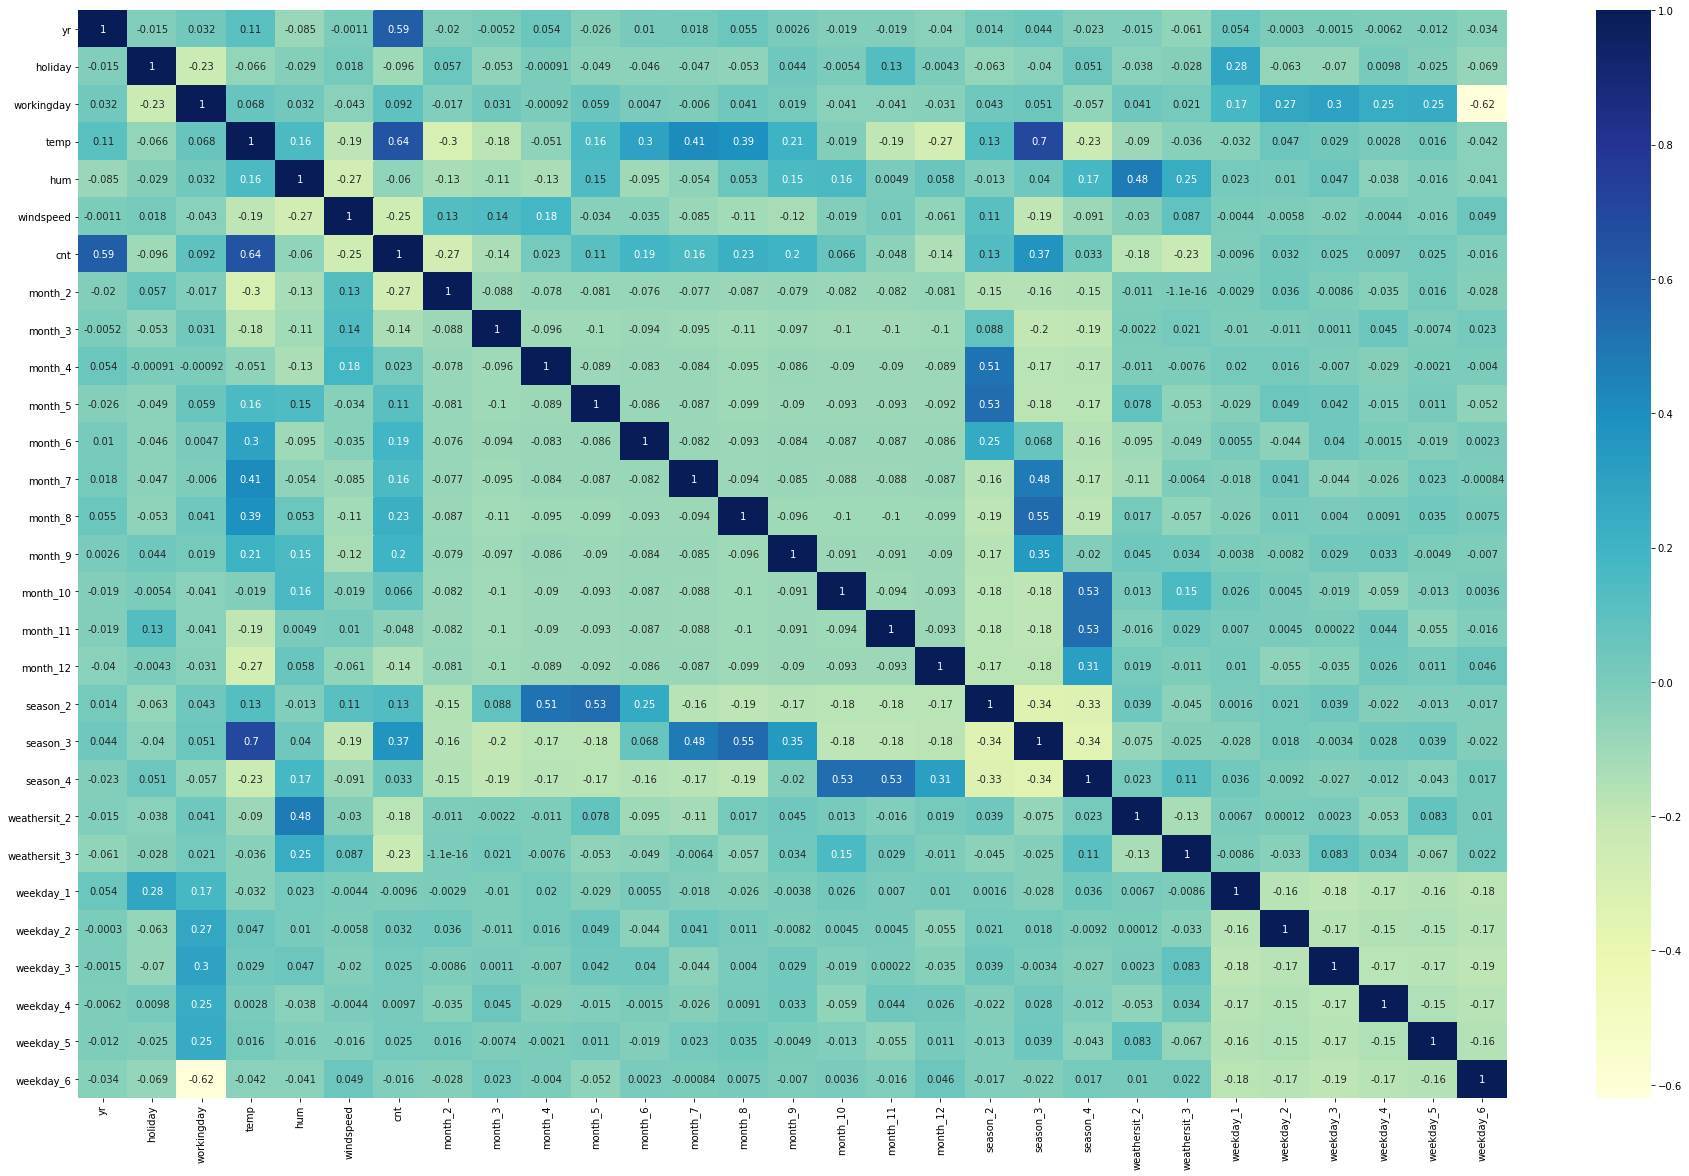

In [110]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (32, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

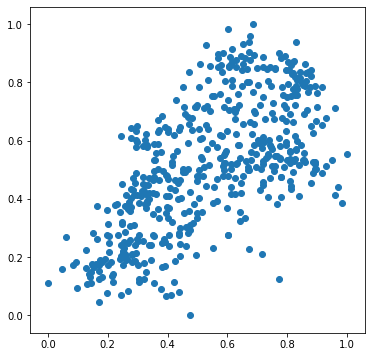

In [111]:
#Plotting the scatter plot between count and temp as temp have a good correlation with count.
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

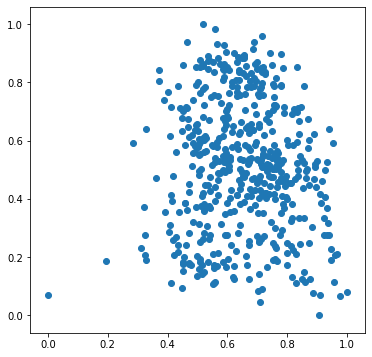

In [112]:
#Plotting the scatter plot between count and hum as humidity have a good correlation with count.
plt.figure(figsize=[6,6])
plt.scatter(df_train.hum, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [113]:
y_train = df_train.pop('cnt')
X_train = df_train

### Building a linear model
Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [114]:
#importing library
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [115]:
# Check the parameters obtained

lr.params

const    0.169798
temp     0.639952
dtype: float64

In [116]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           5.80e-61
Time:                        20:36:02   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

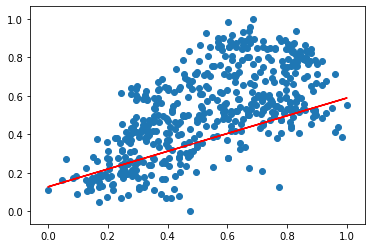

In [117]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

### Adding another variable
The R-squared value obtained is 0.414. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. temp and yr.

In [118]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'yr']]
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.079628
temp     0.583559
yr       0.237213
dtype: float64

In [119]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          9.25e-130
Time:                        20:36:24   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.0

Now value of R-square is much betters than previous now it is 0.690. Lets try to assign all features and analyze them all togheter once. 

In [124]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'yr','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12','season_2','season_3','season_4','weathersit_2','weathersit_3','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6']]
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const           0.048038
temp            0.404785
yr              0.236505
month_2         0.020982
month_3         0.063523
month_4         0.055727
month_5         0.092501
month_6         0.078310
month_7         0.036129
month_8         0.085433
month_9         0.139966
month_10        0.045707
month_11       -0.011676
month_12        0.000869
season_2        0.092467
season_3        0.070559
season_4        0.184142
weathersit_2   -0.081748
weathersit_3   -0.307967
weekday_2       0.026021
weekday_3       0.040856
weekday_4       0.035469
weekday_5       0.046092
weekday_6       0.043088
dtype: float64

With the help of model we can clearly see the impact or count of each columns in the modeling and prediction. so Lets try to reduce number of columns which will be used for preduction so complexity of modeling can be reduced. 

In [125]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     104.6
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.12e-171
Time:                        20:46:22   Log-Likelihood:                 493.24
No. Observations:                 510   AIC:                            -938.5
Df Residuals:                     486   BIC:                            -836.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0480      0.019      2.524   

In [128]:
# Assign only those parameters variables to X which have higher impact.
X_train_lm = X_train[['temp', 'yr','season_2','season_3','season_2','weathersit_2']]
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const           0.077519
temp            0.649965
yr              0.235335
season_2        0.002979
season_3       -0.057257
season_2        0.002979
weathersit_2   -0.027730
weathersit_2   -0.027730
dtype: float64

In [129]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     248.2
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.23e-133
Time:                        21:35:58   Log-Likelihood:                 355.19
No. Observations:                 510   AIC:                            -698.4
Df Residuals:                     504   BIC:                            -673.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0775      0.018      4.379   

In [130]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'yr','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12','season_2','season_3','season_4','weathersit_2','weathersit_3','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6']]
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const           0.048038
temp            0.404785
yr              0.236505
month_2         0.020982
month_3         0.063523
month_4         0.055727
month_5         0.092501
month_6         0.078310
month_7         0.036129
month_8         0.085433
month_9         0.139966
month_10        0.045707
month_11       -0.011676
month_12        0.000869
season_2        0.092467
season_3        0.070559
season_4        0.184142
weathersit_2   -0.081748
weathersit_3   -0.307967
weekday_2       0.026021
weekday_3       0.040856
weekday_4       0.035469
weekday_5       0.046092
weekday_6       0.043088
dtype: float64

In [131]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     104.6
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.12e-171
Time:                        21:47:41   Log-Likelihood:                 493.24
No. Observations:                 510   AIC:                            -938.5
Df Residuals:                     486   BIC:                            -836.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0480      0.019      2.524   

### Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.

In [132]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [133]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Parameters'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Parameters    VIF
23     weekday_2    inf
24     weekday_3    inf
2     workingday    inf
22     weekday_1    inf
26     weekday_5    inf
25     weekday_4    inf
1        holiday    inf
3           temp  47.06
4            hum  20.65
18      season_3  15.40
19      season_4  10.93
12       month_8  10.91
11       month_7   9.60
17      season_2   8.88
13       month_9   7.33
10       month_6   7.31
9        month_5   7.15
14      month_10   6.64
15      month_11   5.99
8        month_4   5.64
5      windspeed   4.47
16      month_12   3.78
7        month_3   3.06
20  weathersit_2   2.21
0             yr   2.09
27     weekday_6   1.93
6        month_2   1.71
21  weathersit_3   1.22

### Dropping the variable and updating the model
As you can see from the summary and the VIF dataframe, some variables are still insignificant. Lets drop weekday variables as it has a very high p-value of infinite. Let's go ahead and drop this variables

In [174]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('weekday_1', 1,)

In [175]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [176]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          8.74e-182
Time:                        23:07:36   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1760      0.030      5.798   

In [177]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Parameters'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Parameters    VIF
3           temp  47.06
4            hum  20.65
18      season_3  15.40
19      season_4  10.93
12       month_8  10.91
11       month_7   9.60
2     workingday   9.22
17      season_2   8.88
13       month_9   7.33
10       month_6   7.31
9        month_5   7.15
14      month_10   6.64
15      month_11   5.99
8        month_4   5.64
5      windspeed   4.47
16      month_12   3.78
7        month_3   3.06
20  weathersit_2   2.21
23     weekday_3   2.20
0             yr   2.09
22     weekday_2   2.00
24     weekday_4   1.98
25     weekday_5   1.95
26     weekday_6   1.93
6        month_2   1.71
21  weathersit_3   1.22
1        holiday   1.21

### Dropping the Variable and Updating the Model
As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.


In [178]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('weekday_2', 1)

In [179]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [180]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          8.39e-183
Time:                        23:08:12   Log-Likelihood:                 527.94
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     483   BIC:                            -887.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1760      0.030      5.803   

In [181]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Parameters'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Parameters    VIF
3           temp  46.95
4            hum  20.62
18      season_3  15.39
19      season_4  10.92
12       month_8  10.91
11       month_7   9.60
17      season_2   8.87
13       month_9   7.33
10       month_6   7.31
9        month_5   7.15
2     workingday   6.74
14      month_10   6.64
15      month_11   5.98
8        month_4   5.64
5      windspeed   4.47
16      month_12   3.78
7        month_3   3.06
20  weathersit_2   2.21
0             yr   2.08
25     weekday_6   1.93
6        month_2   1.71
22     weekday_3   1.62
23     weekday_4   1.51
24     weekday_5   1.48
21  weathersit_3   1.22
1        holiday   1.21

In [182]:
X = X.drop('weekday_3', 1)

In [183]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [184]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     112.2
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.53e-183
Time:                        23:08:51   Log-Likelihood:                 527.23
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -892.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1766      0.030      5.823   

### Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [185]:
y_train_price = lr_4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

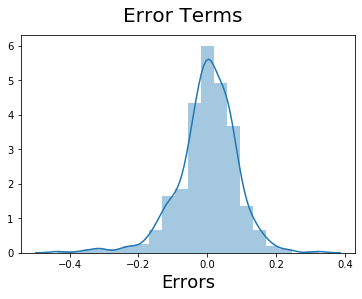

In [186]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

### Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [187]:
num_vars = ['yr', 'temp', 'hum', 'windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [188]:
df_test.describe().transpose()

count      mean           std       min       25%       50%  \
yr            219.0 -0.075476  4.624868e-04 -0.075919 -0.075919 -0.075919   
holiday       219.0  0.036530  1.880338e-01  0.000000  0.000000  0.000000   
workingday    219.0  0.698630  4.599042e-01  0.000000  0.000000  1.000000   
temp          219.0  0.002210  8.165579e-04  0.000420  0.001497  0.002210   
hum           219.0 -0.030071  1.488388e-02 -0.067696 -0.041185 -0.031147   
windspeed     219.0 -0.002531  6.598016e-08 -0.002531 -0.002531 -0.002531   
month_2       219.0  0.100457  3.012965e-01  0.000000  0.000000  0.000000   
month_3       219.0  0.054795  2.281001e-01  0.000000  0.000000  0.000000   
month_4       219.0  0.091324  2.887295e-01  0.000000  0.000000  0.000000   
month_5       219.0  0.086758  2.821249e-01  0.000000  0.000000  0.000000   
month_6       219.0  0.095890  2.951154e-01  0.000000  0.000000  0.000000   
month_7       219.0  0.105023  3.072852e-01  0.000000  0.000000  0.000000   
month_8       219.0  0.059361  2.368400e-01  0.000000  0.000000  0.000000   
month_9       219.0  0.086758  2.821249e-01  0.000000  0.000000  0.000000   
month_10      219.0  0.082192  2.752859e-01  0.000000  0.000000  0.000000   
month_11      219.0  0.073059  2.608301e-01  0.000000  0.000000  0.000000   
month_12      219.0  0.086758  2.821249e-01  0.000000  0.000000  0.000000   
season_2      219.0  0.264840  4.422590e-01  0.000000  0.000000  0.000000   
season_3      219.0  0.246575  4.320048e-01  0.000000  0.000000  0.000000   
season_4      219.0  0.232877  4.236327e-01  0.000000  0.000000  0.000000   
weathersit_2  219.0  0.319635  4.674034e-01  0.000000  0.000000  0.000000   
weathersit_3  219.0  0.027397  1.636120e-01  0.000000  0.000000  0.000000   
weekday_1     219.0  0.127854  3.346920e-01  0.000000  0.000000  0.000000   
weekday_2     219.0  0.164384  3.714723e-01  0.000000  0.000000  0.000000   
weekday_3     219.0  0.100457  3.012965e-01  0.000000  0.000000  0.000000   
weekday_4     219.0  0.164384  3.714723e-01  0.000000  0.000000  0.000000   
weekday_5     219.0  0.178082  3.834584e-01  0.000000  0.000000  0.000000   
weekday_6     219.0  0.118721  3.242015e-01  0.000000  0.000000  0.000000   

                   75%       max  
yr           -0.074995 -0.074995  
holiday       0.000000  1.000000  
workingday    1.000000  1.000000  
temp          0.002910  0.003697  
hum          -0.019538  0.006260  
windspeed    -0.002531 -0.002531  
month_2       0.000000  1.000000  
month_3       0.000000  1.000000  
month_4       0.000000  1.000000  
month_5       0.000000  1.000000  
month_6       0.000000  1.000000  
month_7       0.000000  1.000000  
month_8       0.000000  1.000000  
month_9       0.000000  1.000000  
month_10      0.000000  1.000000  
month_11      0.000000  1.000000  
month_12      0.000000  1.000000  
season_2      1.000000  1.000000  
season_3      0.000000  1.000000  
season_4      0.000000  1.000000  
weathersit_2  1.000000  1.000000  
weathersit_3  0.000000  1.000000  
weekday_1     0.000000  1.000000  
weekday_2     0.000000  1.000000  
weekday_3     0.000000  1.000000  
weekday_4     0.000000  1.000000  
weekday_5     0.000000  1.000000  
weekday_6     0.000000  1.000000

### Dividing into X_test and y_test

In [189]:
y_test = df_test.pop('cnt')
X_test = df_test

KeyError: 'cnt'

In [161]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["weathersit_3", "weathersit_2", "weekday_6",'month_2'], axis = 1)

In [171]:
# Making predictions using the fourth model

y_pred_m4 = lr_4.predict(X_test_m4)

# Model Evaluation¶
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

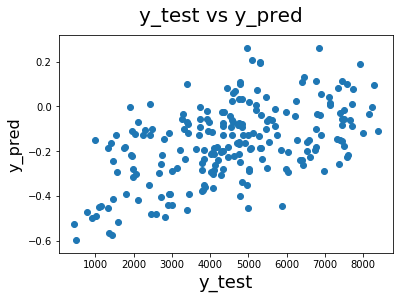

In [173]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

We can see that the equation of our best fitted line is:

cnt=0.452×temp+0.232×yr+0.153×season_4+0.145×month_9+0.05×weekday_6+(-0.255)×weathersit_3+(-0.187)×windspeed+(-0.152)×hum+(-0.052)×holiday

Overall we have a decent model, but we also acknowledge that we could do better.
